In [171]:
#Importation des bibliothèques et du CSV
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

df_original = pd.read_csv('spam.csv', encoding="ISO-8859-1")
df_original.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


# Nettoyage

In [172]:
#Retrait des colonnes inutiles
df = df_original[['v1', 'v2']].copy()
df.rename(columns={"v1": "label", "v2": "content"}, inplace = True)
df.head()

,label,content
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [173]:
print(df.label.value_counts(normalize = True))
#Proportion 'ham' : 4825/5572 = 86.6%

ham     0.865937
spam    0.134063
Name: label, dtype: float64


In [174]:
df.drop_duplicates(inplace = True)
#Retrait des lignes identiques 

print(df.label.value_counts(normalize = True))
#Proportion 'ham' : 4516/5169 = 87.4%
#Le Ratio ham/spam est donc conservé à 0.8% près après retrait des doublons.

df.describe()

ham     0.87367
spam    0.12633
Name: label, dtype: float64


,label,content
count,5169,5169
unique,2,5169
top,ham,"Go until jurong point, crazy.. Available only ..."
freq,4516,1


In [175]:
df.to_csv('spam_clean.csv',index = False)
#export du dataframe nettoyé dans le dossier de travail sous le nom de 'spam_clean.csv'

# Features

In [176]:
import re

In [177]:
df = pd.read_csv('spam_clean.csv')

In [178]:
#Ajout d'une feature "length" contenant le nombre de caractère compris dans le SMS
df['length'] = df['content'].apply(len)
df

,label,content,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5164,spam,This is the 2nd time we have tried 2 contact u...,161
5165,ham,Will Ì_ b going to esplanade fr home?,37
5166,ham,"Pity, * was in mood for that. So...any other s...",57
5167,ham,The guy did some bitching but I acted like i'd...,125


In [179]:
#Ajout d'une feature "num_tel" contenant le nombre de numéros de téléphone dans le message
num_tel = []

for k in df.index:
    num_tel.append(len(re.findall("\s[0-9][0-9][0-9][0-9]",df['content'][k])))

#pd.Series(num_tel).value_counts()
df['num_tel'] = pd.Series(num_tel)
df

,label,content,length,num_tel
0,ham,"Go until jurong point, crazy.. Available only ...",111,0
1,ham,Ok lar... Joking wif u oni...,29,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,3
3,ham,U dun say so early hor... U c already then say...,49,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,0
...,...,...,...,...
5164,spam,This is the 2nd time we have tried 2 contact u...,161,1
5165,ham,Will Ì_ b going to esplanade fr home?,37,0
5166,ham,"Pity, * was in mood for that. So...any other s...",57,0
5167,ham,The guy did some bitching but I acted like i'd...,125,0


In [180]:
#Ajout d'une feature "livre" attestant de la présence du symbole £ dans le message
livre = []

for k in df.index:
    if len(re.findall("£|$",df['content'][k])) == 0:
        livre.append(0)
    else :
        livre.append(1)

#pd.Series(livre).value_counts()
#df['£/$'] = pd.Series(livre)
#df

In [181]:
#Ajout d'une feature "ratio_upper_case" contenant la proportion de majuscules dans le 
ratio = []

for k in df.index:
    char = len(re.findall("[a-zA-Z]",df['content'][k]))
    upper = len(re.findall("[A-Z]",df['content'][k]))
    if upper == 0:
        ratio.append(0)
    else:
        ratio.append(round((upper/char), 4))

df['ratio_UC'] = pd.Series(ratio)
df

,label,content,length,num_tel,ratio_UC
0,ham,"Go until jurong point, crazy.. Available only ...",111,0,0.0361
1,ham,Ok lar... Joking wif u oni...,29,0,0.1111
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,3,0.1031
3,ham,U dun say so early hor... U c already then say...,49,0,0.0606
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,0,0.0426
...,...,...,...,...,...
5164,spam,This is the 2nd time we have tried 2 contact u...,161,1,0.0891
5165,ham,Will Ì_ b going to esplanade fr home?,37,0,0.0370
5166,ham,"Pity, * was in mood for that. So...any other s...",57,0,0.0488
5167,ham,The guy did some bitching but I acted like i'd...,125,0,0.0202


In [182]:
#Ajout d'une feature "URL" contenant le nombre d'URL dans le message
URL = []

for k in df.index:
        URL.append(len(re.findall(r"\.[Cc][Oo]",df['content'][k])))

#pd.Series(URL).value_counts()
df['URL'] = pd.Series(URL)
df

,label,content,length,num_tel,ratio_UC,URL
0,ham,"Go until jurong point, crazy.. Available only ...",111,0,0.0361,0
1,ham,Ok lar... Joking wif u oni...,29,0,0.1111,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,3,0.1031,0
3,ham,U dun say so early hor... U c already then say...,49,0,0.0606,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,0,0.0426,0
...,...,...,...,...,...,...
5164,spam,This is the 2nd time we have tried 2 contact u...,161,1,0.0891,0
5165,ham,Will Ì_ b going to esplanade fr home?,37,0,0.0370,0
5166,ham,"Pity, * was in mood for that. So...any other s...",57,0,0.0488,0
5167,ham,The guy did some bitching but I acted like i'd...,125,0,0.0202,0


In [197]:
#Ajout de features justifiant la présence de certains mots connotés SPAM 
free = []
call = []
txt = []
text = []
claim = []
mobile = []
stop = []
reply = []
sex = []

for k in df.index:
    free.append((len(re.findall("[Ff][Rr][Ee][Ee]",df['content'][k]))))
    call.append((len(re.findall("[Cc][Aa][Ll][Ll]",df['content'][k]))))
    txt.append((len(re.findall("[Tt][Xx][Tt]",df['content'][k]))))
    text.append((len(re.findall("[Tt][Ee][Xx][Tt]",df['content'][k]))))
    claim.append((len(re.findall("[Cc][Ll][Aa][Ii][Mm]",df['content'][k]))))
    mobile.append((len(re.findall("[Mm][Oo][Bb][Ii][Ll][Ee]",df['content'][k]))))
    stop.append((len(re.findall("[Ss][Tt][Oo][Pp]",df['content'][k]))))
    reply.append((len(re.findall("[Rr][Ee][Pp][Ll][Yy]",df['content'][k]))))
    sex.append((len(re.findall("[Ss][Ee][Xx]",df['content'][k]))))

#L = [free, call, txt, text, claim, mobile, stop, reply, sex]
#for k in L:
#    print(pd.Series(k).value_counts())

df['free'] = pd.Series(free)
df['call'] = pd.Series(call)
df['txt'] = pd.Series(txt)
df['text'] = pd.Series(text)
df['claim'] = pd.Series(claim)
df['mobile'] = pd.Series(mobile)
df['stop'] = pd.Series(stop)
df['reply'] = pd.Series(reply)
df['sex'] = pd.Series(sex)

df

,label,content,length,num_tel,ratio_UC,URL,free,call,txt,text,claim,mobile,stop,reply,sex
0,ham,"Go until jurong point, crazy.. Available only ...",111,0,0.0361,0,0,0,0,0,0,0,0,0,0
1,ham,Ok lar... Joking wif u oni...,29,0,0.1111,0,0,0,0,0,0,0,0,0,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,3,0.1031,0,1,0,1,1,0,0,0,0,0
3,ham,U dun say so early hor... U c already then say...,49,0,0.0606,0,0,0,0,0,0,0,0,0,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,0,0.0426,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5164,spam,This is the 2nd time we have tried 2 contact u...,161,1,0.0891,0,0,1,0,0,1,0,0,0,0
5165,ham,Will Ì_ b going to esplanade fr home?,37,0,0.0370,0,0,0,0,0,0,0,0,0,0
5166,ham,"Pity, * was in mood for that. So...any other s...",57,0,0.0488,0,0,0,0,0,0,0,0,0,0
5167,ham,The guy did some bitching but I acted like i'd...,125,0,0.0202,0,1,0,0,0,0,0,0,0,0


In [184]:
df.to_csv('spam_features.csv',index = False)

# Preprocessing

In [185]:
# data
import pandas as pd

# Preprocessing
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, LabelBinarizer, OneHotEncoder, StandardScaler, RobustScaler, MinMaxScaler


# Pipeline and model
from sklearn.pipeline import Pipeline
from sklearn import set_config
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import CategoricalNB, GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

# Score of models
from sklearn.metrics import accuracy_score

In [186]:
df = pd.read_csv('spam_features.csv')
print("\n\n Nombre de messages 'null' :",df.content.isnull().sum())
df.head()



 Nombre de messages 'null' : 0


,label,content,length,num_tel,ratio_UC,URL,free,call,txt,text,claim,mobile,stop,reply,sex
0,ham,"Go until jurong point, crazy.. Available only ...",111,0,0.0361,0,0,0,0,0,0,0,0,0,0
1,ham,Ok lar... Joking wif u oni...,29,0,0.1111,0,0,0,0,0,0,0,0,0,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,3,0.1031,0,1,0,1,1,0,0,0,0,0
3,ham,U dun say so early hor... U c already then say...,49,0,0.0606,0,0,0,0,0,0,0,0,0,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,0,0.0426,0,0,0,0,0,0,0,0,0,0


In [187]:
#Target preprocessing
label = LabelEncoder()
y = label.fit_transform(df.label)
type(y), y
# ham : 0, spam : 1

(numpy.ndarray, array([0, 0, 1, ..., 0, 0, 0]))

In [188]:
#Features preprocessing
X = df.drop(columns = 'label')
X.head()

,content,length,num_tel,ratio_UC,URL,free,call,txt,text,claim,mobile,stop,reply,sex
0,"Go until jurong point, crazy.. Available only ...",111,0,0.0361,0,0,0,0,0,0,0,0,0,0
1,Ok lar... Joking wif u oni...,29,0,0.1111,0,0,0,0,0,0,0,0,0,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,155,3,0.1031,0,1,0,1,1,0,0,0,0,0
3,U dun say so early hor... U c already then say...,49,0,0.0606,0,0,0,0,0,0,0,0,0,0
4,"Nah I don't think he goes to usf, he lives aro...",61,0,0.0426,0,0,0,0,0,0,0,0,0,0


In [189]:
#Selection des features catégoriques
column_cat = df.select_dtypes(include=['object']).columns.drop(['content', 'label'])
print(column_cat)

#Pipeline de preprocessing des features numériques
transformer_cat = Pipeline(steps=[
    ('imputation', SimpleImputer(strategy='most_frequent')), #Imputation facultative car données complètes
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse = False))
])

Index([], dtype='object')


In [190]:
#Selection des features numériques
column_num = df.select_dtypes(include=['int','float']).columns
print(column_num)

#Pipeline de preprocessing des features numériques
transformer_num = Pipeline(steps = [
    ('imputation', SimpleImputer(strategy='median')), #Imputation facultative car données complètes
    ('scaling', MinMaxScaler())
])

Index(['length', 'num_tel', 'ratio_UC', 'URL', 'free', 'call', 'txt', 'text',
       'claim', 'mobile', 'stop', 'reply', 'sex'],
      dtype='object')


In [191]:
#Features Columns Transformer
preparation = ColumnTransformer(transformers = [
    ('data_num', transformer_num, column_num), 
    ('data_cat', transformer_cat, column_cat)
])

In [192]:
#Création du modèle
model = DecisionTreeClassifier()
model2 = GaussianNB()

pipe_model = Pipeline(steps=[
    ('preparation', preparation),
    ('model', model2)])

set_config(display = 'diagram')
pipe_model

Pipeline(steps=[('preparation',
                 ColumnTransformer(transformers=[('data_num',
                                                  Pipeline(steps=[('imputation',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaling',
                                                                   MinMaxScaler())]),
                                                  Index(['length', 'num_tel', 'ratio_UC', 'URL', 'free', 'call', 'txt', 'text',
       'claim', 'mobile', 'stop', 'reply', 'sex'],
      dtype='object')),
                                                 ('data_cat',
                                                  Pipeline(steps=[('imputation',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  Index([], dtype='object'))])),
                ('model', GaussianNB())])

In [193]:
#Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1, stratify = y)
y_train, y_test, X_train, X_test

(array([0, 0, 1, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
                                                 content  length  num_tel  \
 2260  Okay same with me. Well thanks for the clarifi...      52        0   
 4258  Try to do something dear. You read something f...      54        0   
 478   FREE MESSAGE Activate your 500 FREE Text Messa...     146        0   
 5113            ItÛ÷s reassuring, in this crazy world.      39        0   
 1881  The battery is for mr adewale my uncle. Aka Egbon      49        0   
 ...                                                 ...     ...      ...   
 2520  Sorry da thangam, very very sorry i am held up...      59        0   
 2736  Fuck cedar key and fuck her (come over anyway ...      50        0   
 2131  * Will have two more cartons off u and is very...      67        0   
 4807  I will come with karnan car. Please wait till ...      76        0   
 1509  Message from . I am at Truro Hospital on ext. ...      97        0   
 
       r

In [194]:
pipe_model.fit(X_train, y_train)

Pipeline(steps=[('preparation',
                 ColumnTransformer(transformers=[('data_num',
                                                  Pipeline(steps=[('imputation',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaling',
                                                                   MinMaxScaler())]),
                                                  Index(['length', 'num_tel', 'ratio_UC', 'URL', 'free', 'call', 'txt', 'text',
       'claim', 'mobile', 'stop', 'reply', 'sex'],
      dtype='object')),
                                                 ('data_cat',
                                                  Pipeline(steps=[('imputation',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  Index([], dtype='object'))])),
                ('model', GaussianNB())])

Accuracy Score : 0.96056


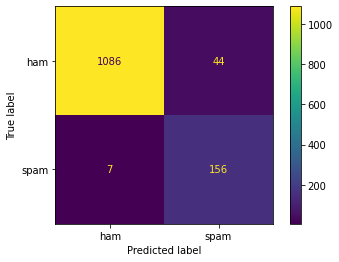

In [195]:
y_pred = pipe_model.predict(X_test)

# Score of models
score = accuracy_score(y_test, y_pred)
print("Accuracy Score :", round(score, 5))

#Matrice de confusion
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels = ["ham", "spam"]).plot()

In [196]:
#Extraction des faux postifs et faux négatifs pour analyse
message = X_test.content.tolist() #Récupération de la liste des messages test
faux_positifs = []
faux_négatifs = []
for k in range(len(y_test)):
    if y_test[k] != y_pred[k]:
        if y_test[k] == 0:
            faux_positifs.append(message[k])
        else:
            faux_négatifs.append(message[k])
len(faux_positifs), faux_positifs, len(faux_négatifs),faux_négatifs

(44,
 ['I got to video tape pple type in message lor. U so free wan 2 help me? Hee... Cos i noe u wan 2 watch infernal affairs so ask u along. Asking shuhui oso.',
  'Good afternoon sexy buns! How goes the job search ? I wake and you are my first thought as always, my love. I wish your fine and happy and know I adore you!',
  'Text her. If she doesnt reply let me know so i can have her log in',
  'Its worse if if uses half way then stops. Its better for him to complete it.',
  'Send his number and give reply tomorrow morning for why you said that to him like that ok',
  "oh ya... Got hip hop open. Haha i was thinking can go for jazz then zoom to cine... Actually tonight i'm free leh... And there's a kb lesson tonight",
  'Am not working but am up to eyes in philosophy so will text u later when a bit more free for chat...',
  'Hi its me you are probably having too much fun to get this message but i thought id txt u cos im bored! and james has been farting at me all night',
  "Hey what's